# Alzheimer's Dataset Analysis

In [1]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### Exploratory Data Analysis (EDA):

In [2]:
train_dir = '/content/drive/MyDrive/Alzheimer_s Dataset/train'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [3]:
train_df

,filepaths,labels
0,/content/drive/MyDrive/Alzheimer_s Dataset/tra...,VeryMildDemented
1,/content/drive/MyDrive/Alzheimer_s Dataset/tra...,VeryMildDemented
2,/content/drive/MyDrive/Alzheimer_s Dataset/tra...,VeryMildDemented
3,/content/drive/MyDrive/Alzheimer_s Dataset/tra...,VeryMildDemented
4,/content/drive/MyDrive/Alzheimer_s Dataset/tra...,VeryMildDemented
...,...,...
5136,/content/drive/MyDrive/Alzheimer_s Dataset/tra...,NonDemented
5137,/content/drive/MyDrive/Alzheimer_s Dataset/tra...,NonDemented
5138,/content/drive/MyDrive/Alzheimer_s Dataset/tra...,NonDemented
5139,/content/drive/MyDrive/Alzheimer_s Dataset/tra...,NonDemented


from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
# Generate  test data paths with labels
test_dir = '/content/drive/MyDrive/Alzheimer_s Dataset/test'
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

In [5]:
test_df

,filepaths,labels
0,/content/drive/MyDrive/Alzheimer_s Dataset/tes...,NonDemented
1,/content/drive/MyDrive/Alzheimer_s Dataset/tes...,NonDemented
2,/content/drive/MyDrive/Alzheimer_s Dataset/tes...,NonDemented
3,/content/drive/MyDrive/Alzheimer_s Dataset/tes...,NonDemented
4,/content/drive/MyDrive/Alzheimer_s Dataset/tes...,NonDemented
...,...,...
1274,/content/drive/MyDrive/Alzheimer_s Dataset/tes...,MildDemented
1275,/content/drive/MyDrive/Alzheimer_s Dataset/tes...,MildDemented
1276,/content/drive/MyDrive/Alzheimer_s Dataset/tes...,MildDemented
1277,/content/drive/MyDrive/Alzheimer_s Dataset/tes...,MildDemented


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
valid_df, test_df = train_test_split(test_df,  train_size= 0.6, shuffle= True, random_state= 123)

### Data Preprocessing:

In [7]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5141 validated image filenames belonging to 4 classes.
Found 767 validated image filenames belonging to 4 classes.
Found 512 validated image filenames belonging to 4 classes.


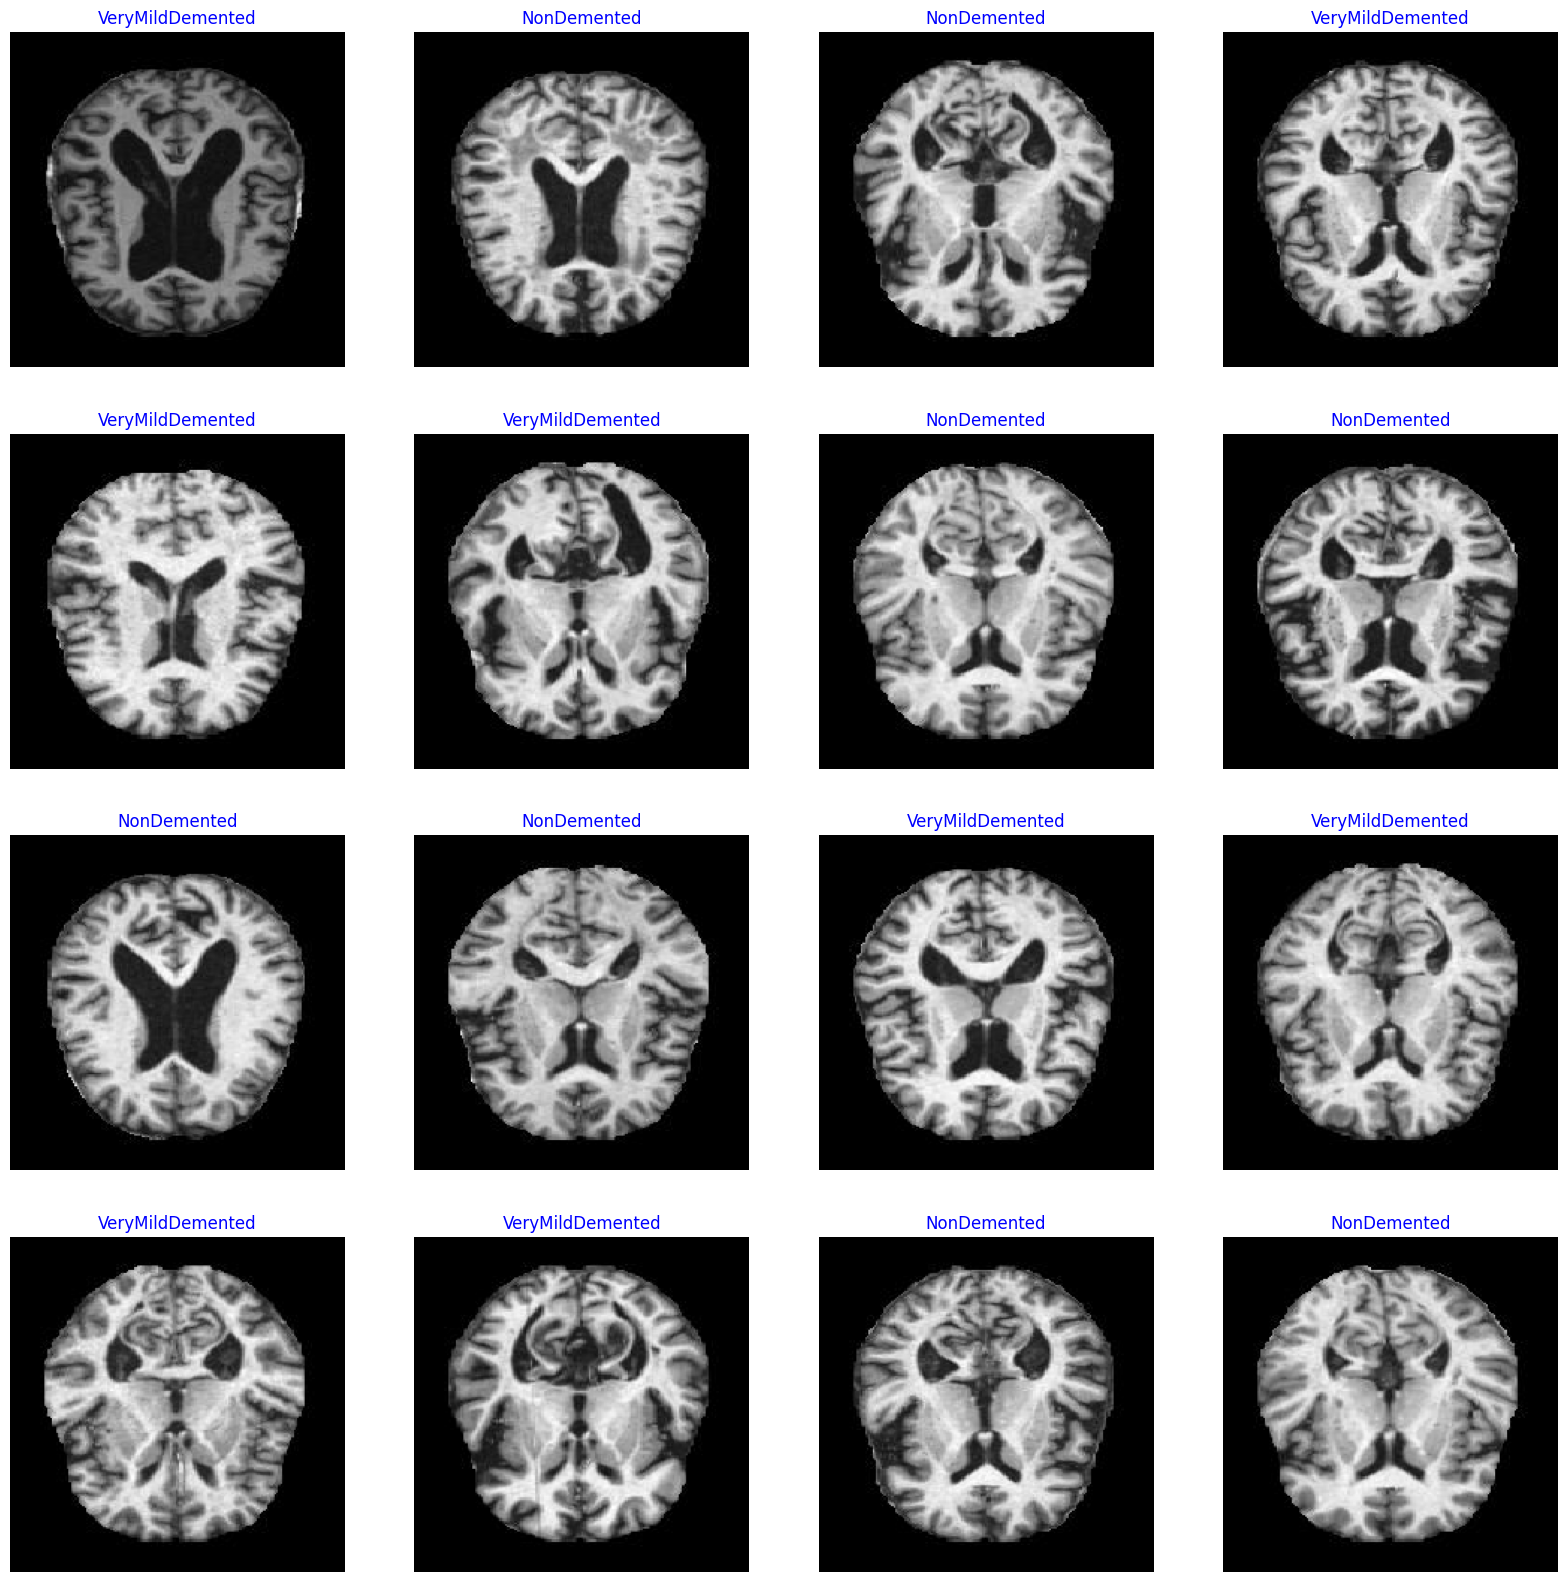

In [8]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()


## Models for Alzheimer's Disease Classification
### EfficientNetB0 Transfer Learning model from EfficientNet family

In [9]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

#efficientnetb0 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
transfer_model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(128, activation='relu'),
    Dropout(rate=0.3),
    Dense(class_count, activation='softmax')
])
transfer_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

transfer_model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                         

In [10]:
batch_size = 16
epochs =  10

history = transfer_model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/10
322/322 [==============================] - 611s 2s/step - loss: 1.0867 - accuracy: 0.5742 - val_loss: 1.3213 - val_accuracy: 0.5632
Epoch 2/10
322/322 [==============================] - 50s 155ms/step - loss: 0.5836 - accuracy: 0.7670 - val_loss: 1.0204 - val_accuracy: 0.6584
Epoch 3/10
322/322 [==============================] - 50s 154ms/step - loss: 0.3063 - accuracy: 0.8819 - val_loss: 0.9083 - val_accuracy: 0.7040
Epoch 4/10
322/322 [==============================] - 50s 155ms/step - loss: 0.1971 - accuracy: 0.9274 - val_loss: 0.9078 - val_accuracy: 0.7027
Epoch 5/10
322/322 [==============================] - 50s 155ms/step - loss: 0.1326 - accuracy: 0.9525 - val_loss: 1.8326 - val_accuracy: 0.6636
Epoch 6/10
322/322 [==============================] - 50s 156ms/step - loss: 0.1137 - accuracy: 0.9586 - val_loss: 0.7674 - val_accuracy: 0.7588
Epoch 7/10
322/322 [==============================] - 50s 155ms/step - loss: 0.0779 - accuracy: 0.9730 - val_loss: 1.0727 - val_accu

8/8 [==============================] - 19s 3s/step - loss: 0.8697 - accuracy: 0.7812
Train Accuracy:  1.0
Test Accuracy:  0.78125


<ipython-input-11-ad57191fd51d>:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = transfer_model.predict_generator(test_gen)


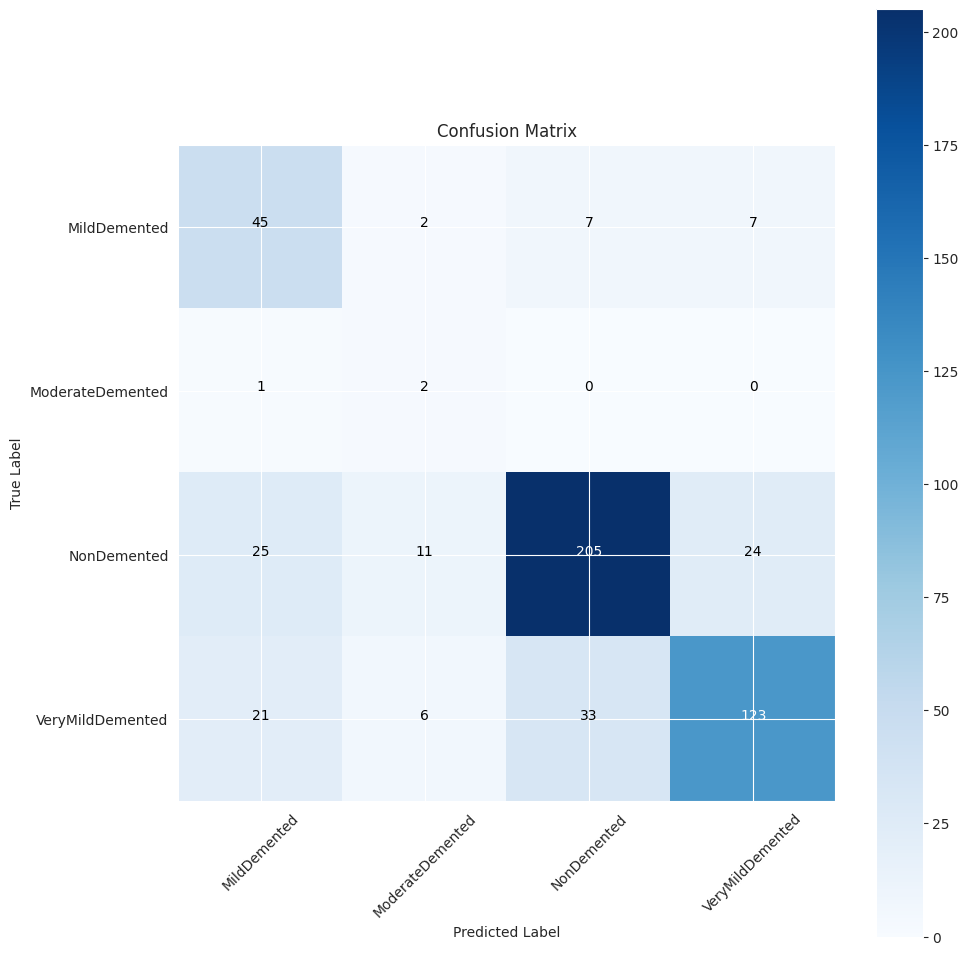

Classification Report:

                  precision    recall  f1-score   support

    MildDemented       0.49      0.74      0.59        61
ModerateDemented       0.10      0.67      0.17         3
     NonDemented       0.84      0.77      0.80       265
VeryMildDemented       0.80      0.67      0.73       183

        accuracy                           0.73       512
       macro avg       0.55      0.71      0.57       512
    weighted avg       0.78      0.73      0.75       512



In [11]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = transfer_model.evaluate(train_gen, steps= test_steps, verbose= 1)
test_score = transfer_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Accuracy: ", train_score[1])
print("Test Accuracy: ", test_score[1])

preds = transfer_model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(test_gen.classes, y_pred, target_names=classes))

In [12]:
transfer_model.save('transfer_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Custom Deep Learing Model (DNN Model)

In [13]:
dnn_model = Sequential([
    Flatten(input_shape=img_shape),
    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(class_count, activation='softmax')
], name="dnn_model")

dnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

dnn_model.summary()

Model: "dnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 1024)              154141696 
                                                                 
 batch_normalization_1 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                        

In [16]:
batch_size = 16   # set batch size for training
epochs =  10  # number of all epochs in training

history = dnn_model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/10
322/322 [==============================] - 23s 72ms/step - loss: 1.1154 - accuracy: 0.8347 - val_loss: 1.9429 - val_accuracy: 0.4876
Epoch 2/10
322/322 [==============================] - 23s 71ms/step - loss: 1.0456 - accuracy: 0.8413 - val_loss: 3.7591 - val_accuracy: 0.5372
Epoch 3/10
322/322 [==============================] - 24s 74ms/step - loss: 1.0619 - accuracy: 0.8096 - val_loss: 5.0312 - val_accuracy: 0.4980
Epoch 4/10
322/322 [==============================] - 23s 71ms/step - loss: 0.9589 - accuracy: 0.8419 - val_loss: 2.0555 - val_accuracy: 0.5684
Epoch 5/10
322/322 [==============================] - 24s 73ms/step - loss: 0.8916 - accuracy: 0.8494 - val_loss: 2.4969 - val_accuracy: 0.3651
Epoch 6/10
322/322 [==============================] - 23s 70ms/step - loss: 0.8757 - accuracy: 0.8428 - val_loss: 32.1860 - val_accuracy: 0.5176
Epoch 7/10
322/322 [==============================] - 24s 74ms/step - loss: 0.9175 - accuracy: 0.8138 - val_loss: 9.3527 - val_accuracy

8/8 [==============================] - 0s 48ms/step - loss: 4.9968 - accuracy: 0.5859
Train Accuracy:  0.78125
Test Accuracy:  0.5859375


<ipython-input-17-7137f2eda72f>:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = dnn_model.predict_generator(test_gen)


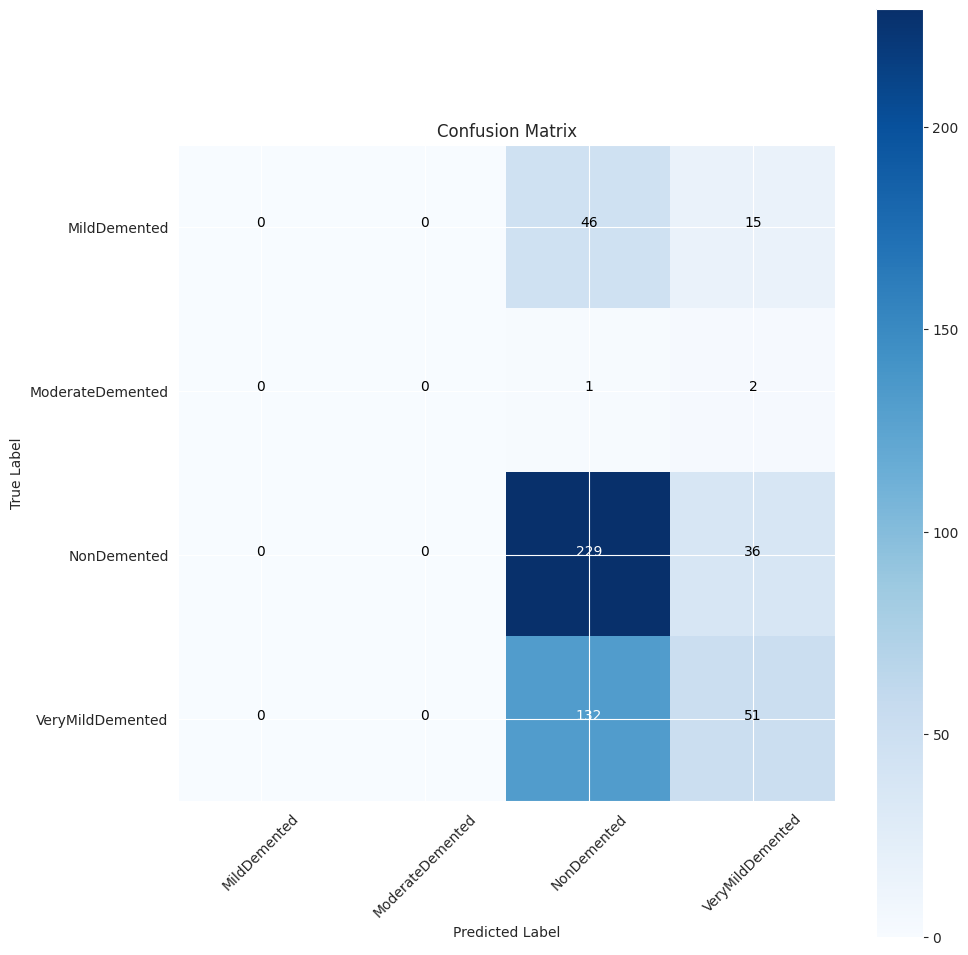

Classification Report:

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00        61
ModerateDemented       0.00      0.00      0.00         3
     NonDemented       0.56      0.86      0.68       265
VeryMildDemented       0.49      0.28      0.36       183

        accuracy                           0.55       512
       macro avg       0.26      0.29      0.26       512
    weighted avg       0.47      0.55      0.48       512



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = dnn_model.evaluate(train_gen, steps= test_steps, verbose= 1)
test_score = dnn_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Accuracy: ", train_score[1])
print("Test Accuracy: ", test_score[1])

preds = dnn_model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(test_gen.classes, y_pred, target_names=classes))

In [18]:
dnn_model.save('dnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Student Developed Model:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

student_model = Sequential([
    Input(shape=(*img_size, 3)),
    Conv2D(16, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(4, activation='softmax')
], name="student_model")

student_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

student_model.summary()

Model: "student_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                     

In [ ]:
batch_size = 32   # set batch size for training
epochs =  10  # number of all epochs in training

history = student_model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/10
322/322 [==============================] - 1230s 4s/step - loss: 1.3605 - accuracy: 0.4923 - val_loss: 0.9616 - val_accuracy: 0.5671
Epoch 2/10
322/322 [==============================] - 342s 1s/step - loss: 0.6996 - accuracy: 0.7285 - val_loss: 0.9706 - val_accuracy: 0.6010
Epoch 3/10
322/322 [==============================] - 341s 1s/step - loss: 0.3359 - accuracy: 0.8819 - val_loss: 1.6366 - val_accuracy: 0.5372
Epoch 4/10
322/322 [==============================] - 341s 1s/step - loss: 0.2233 - accuracy: 0.9253 - val_loss: 1.2249 - val_accuracy: 0.5958
Epoch 5/10
322/322 [==============================] - 344s 1s/step - loss: 0.1411 - accuracy: 0.9508 - val_loss: 1.2082 - val_accuracy: 0.6519
Epoch 6/10
322/322 [==============================] - 335s 1s/step - loss: 0.1111 - accuracy: 0.9646 - val_loss: 1.2165 - val_accuracy: 0.6428
Epoch 7/10
322/322 [==============================] - 354s 1s/step - loss: 0.0911 - accuracy: 0.9702 - val_loss: 1.7642 - val_accuracy: 0.558

8/8 [==============================] - 24s 3s/step - loss: 1.1241 - accuracy: 0.7109
Train Accuracy:  1.0
Test Accuracy:  0.7109375


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 82s 3s/step


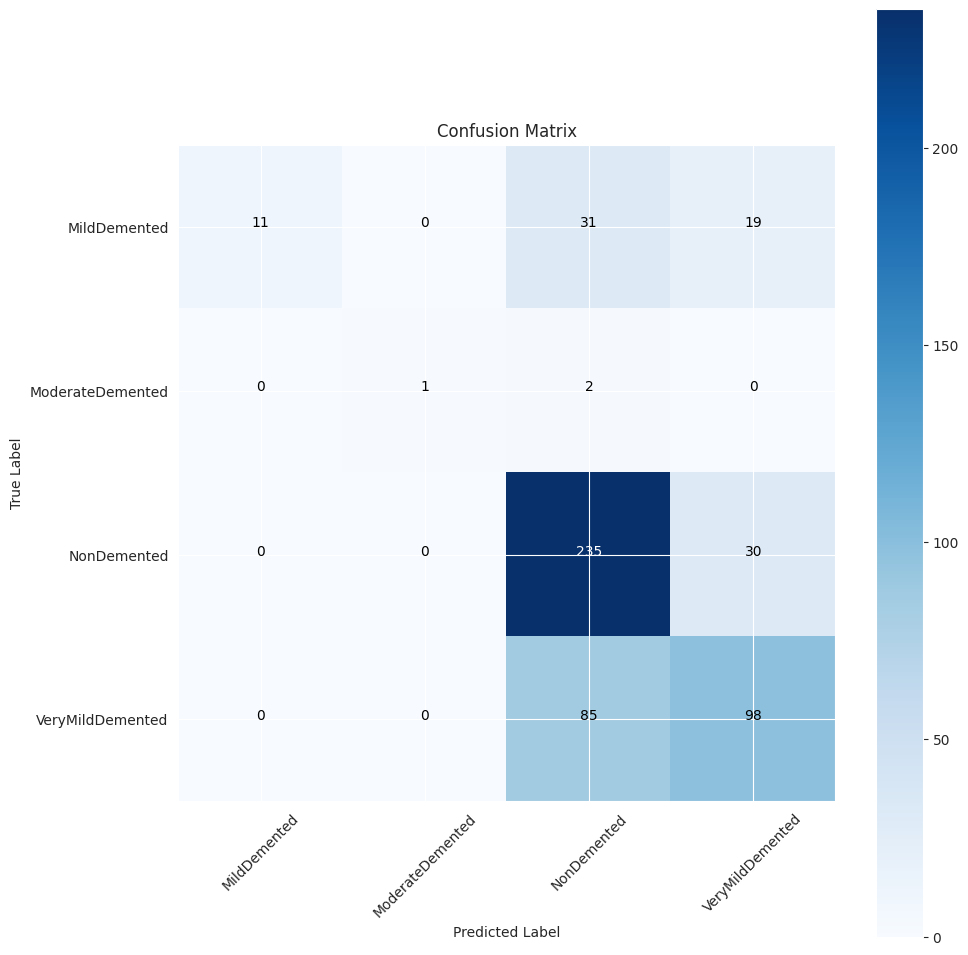

Classification Report:

                  precision    recall  f1-score   support

    MildDemented       1.00      0.18      0.31        61
ModerateDemented       1.00      0.33      0.50         3
     NonDemented       0.67      0.89      0.76       265
VeryMildDemented       0.67      0.54      0.59       183

        accuracy                           0.67       512
       macro avg       0.83      0.48      0.54       512
    weighted avg       0.71      0.67      0.65       512



In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = student_model.evaluate(train_gen, steps= test_steps, verbose= 1)
test_score = student_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Accuracy: ", train_score[1])
print("Test Accuracy: ", test_score[1])

# Predictions
preds = student_model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

# Get class indices
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Generate confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(test_gen.classes, y_pred, target_names=classes))

In [ ]:
student_model.save('student_model.h5')

# Model Evaluation

## EfficientNetB0 Transfer Learning Model

- **Training Accuracy:** 1.0 (100%)
- **Test Accuracy:** 0.78125 (78.12%)
- **Precision, Recall, and F1-Score:**
  - MildDemented: Precision=0.49, Recall=0.74, F1-Score=0.59
  - ModerateDemented: Precision=0.10, Recall=0.67, F1-Score=0.17
  - NonDemented: Precision=0.84, Recall=0.77, F1-Score=0.80
  - VeryMildDemented: Precision=0.80, Recall=0.67, F1-Score=0.73

- **Strengths:**
    - Achieves a relatively high test accuracy of 0.78125.
    - Good precision, recall, and F1-scores for most classes.
    - Utilizes transfer learning from EfficientNetB0, which is a powerful pre-trained model.

- **Weaknesses:**
    - Relatively long training time per epoch (around 50 seconds).
    - ModerateDemented class has lower precision and F1-score, indicating a challenge in classification.

## Custom Deep Learning Model (DNN Model)

- **Training Accuracy:** 0.78125 (78.12%)
- **Test Accuracy:** 0.5859375 (58.59%)
- **Precision, Recall, and F1-Score:**
  - MildDemented: Precision=0.00, Recall=0.00, F1-Score=0.00
  - ModerateDemented: Precision=0.00, Recall=0.00, F1-Score=0.00
  - NonDemented: Precision=0.56, Recall=0.86, F1-Score=0.68
  - VeryMildDemented: Precision=0.49, Recall=0.28, F1-Score=0.36

- **Strengths:**
    - Achieves moderate test accuracy.
    - Utilizes a custom deep learning architecture.

- **Weaknesses:**
    - Poor performance for the MildDemented and ModerateDemented classes, with precision, recall, and F1-scores of 0.00.
    - Relatively long training time per epoch (around 23 seconds).
    - Lower overall test accuracy compared to the transfer learning model.

## Student Developed Model

- **Training Accuracy:** 1.0 (100%)
- **Test Accuracy:** 0.7109375 (71.09%)
- **Precision, Recall, and F1-Score:**
  - MildDemented: Precision=1.00, Recall=0.18, F1-Score=0.31
  - ModerateDemented: Precision=1.00, Recall=0.33, F1-Score=0.50
  - NonDemented: Precision=0.67, Recall=0.89, F1-Score=0.76
  - VeryMildDemented: Precision=0.67, Recall=0.54, F1-Score=0.59

- **Strengths:**
    - Achieves good test accuracy of 0.7109375.
    - Provides high precision, recall, and F1-scores for most classes.
    - Training time per epoch is relatively short (around 342 seconds).

- **Weaknesses:**
    - Lower recall for the MildDemented and ModerateDemented classes compared to the NonDemented class.
    - The model is still less accurate than the transfer learning model.


## Discussion

The evaluation of three different models for predicting the stages of Alzheimer's disease on this dataset has provided valuable insights into their performance and behavior.

### EfficientNetB0 Transfer Learning Model

The EfficientNetB0 transfer learning model demonstrated impressive performance with a test accuracy of 0.78125. It leveraged pre-trained features from EfficientNetB0, a powerful deep learning architecture, allowing it to capture meaningful patterns in the dataset. This model achieved good precision, recall, and F1-scores for most classes, particularly for the NonDemented class. However, it had challenges in accurately classifying the ModerateDemented cases, as indicated by the lower precision and F1-score for this class.

### Custom Deep Learning Model (DNN Model)

The custom DNN model showed moderate performance, with a test accuracy of 0.5859375. While it did not perform well in classifying the MildDemented and ModerateDemented cases, it achieved better results for the NonDemented and VeryMildDemented classes. This model utilized a custom deep learning architecture, but its performance suffered due to the lack of pre-trained features and the need for further optimization.

### Student Developed Model

The student-developed model demonstrated promise, with a test accuracy of 0.7109375. It achieved high precision, recall, and F1-scores for most classes, showcasing its potential. However, it struggled with recall for the MildDemented and ModerateDemented classes compared to the NonDemented class.

## Conclusion

Based on the analysis of these models and their performance on this dataset, the following recommendations can be made:

1. **EfficientNetB0 Transfer Learning Model:** This model is the most effective among the three. It achieved the highest test accuracy and performed well in classifying dementia stages. Its use of transfer learning from EfficientNetB0, a powerful pre-trained model, allowed it to leverage relevant features effectively. Despite some challenges in classifying ModerateDemented cases, it remains the top choice for predicting Alzheimer's disease stages.

2. **Custom Deep Learning Model (DNN Model):** While this model showed moderate performance, it needs further improvement, especially in accurately classifying MildDemented and ModerateDemented cases. It might benefit from exploring different architectures or incorporating transfer learning to enhance its feature representation.

3. **Student Developed Model:** The student-developed model has potential with its good accuracy and balanced precision and recall for most classes. To make it the most effective model, it should focus on improving recall for the MildDemented and ModerateDemented cases, possibly through hyperparameter tuning and data augmentation.

In summary, for predicting the stages of Alzheimer's disease in this specific dataset, the EfficientNetB0 transfer learning model is the recommended choice due to its high accuracy and overall solid performance. However, further research and experimentation can help improve the custom DNN model and the student-developed model to potentially challenge the transfer learning model in the future.
